In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [89]:
df = pd.read_csv("website_analytics_data.csv")

In [91]:
df

,Default channel group,Date+hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Paid Search,2024-01-01 00:00:00,3,2,1,401.50,1.79,9.00,0.79,6
1,Organic Search,2024-01-01 01:00:00,4,2,3,202.43,4.97,4.70,0.69,3
2,Social,2024-01-01 02:00:00,1,1,4,487.68,1.77,2.48,0.42,2
3,Referral,2024-01-01 03:00:00,3,3,3,494.24,2.95,1.29,0.39,7
4,Referral,2024-01-01 04:00:00,3,4,3,133.09,1.76,9.27,0.66,4
...,...,...,...,...,...,...,...,...,...,...
49995,Display,2029-09-14 03:00:00,4,1,2,217.75,3.51,1.94,0.56,8
49996,Social,2029-09-14 04:00:00,4,1,4,525.79,1.28,2.26,0.31,4
49997,Referral,2029-09-14 05:00:00,3,5,4,370.34,4.95,6.17,0.40,1
49998,Direct,2029-09-14 06:00:00,2,3,5,492.37,3.78,9.59,0.32,16


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Default channel group                50000 non-null  object 
 1   Date+hour                            50000 non-null  object 
 2   Users                                50000 non-null  int64  
 3   Sessions                             50000 non-null  int64  
 4   Engaged sessions                     50000 non-null  int64  
 5   Average engagement time per session  50000 non-null  float64
 6   Engaged sessions per user            50000 non-null  float64
 7   Events per session                   50000 non-null  float64
 8   Engagement rate                      50000 non-null  float64
 9   Event count                          50000 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 3.8+ MB


In [97]:
df['Date+hour'] = pd.to_datetime(df['Date+hour'], format='%Y-%m-%d %H:%M', errors='coerce')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Default channel group                50000 non-null  object        
 1   Date+hour                            0 non-null      datetime64[ns]
 2   Users                                50000 non-null  int64         
 3   Sessions                             50000 non-null  int64         
 4   Engaged sessions                     50000 non-null  int64         
 5   Average engagement time per session  50000 non-null  float64       
 6   Engaged sessions per user            50000 non-null  float64       
 7   Events per session                   50000 non-null  float64       
 8   Engagement rate                      50000 non-null  float64       
 9   Event count                          50000 non-null  int64         
dtypes: datetim

In [101]:
df = pd.read_csv('website_analytics_data.csv')
print(df['Date+hour'].head(5))

0    2024-01-01 00:00:00
1    2024-01-01 01:00:00
2    2024-01-01 02:00:00
3    2024-01-01 03:00:00
4    2024-01-01 04:00:00
Name: Date+hour, dtype: object


In [103]:
df['Date+hour'] = df['Date+hour'].astype(str).str.strip()
df['Date+hour'] = pd.to_datetime(df['Date+hour'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Hour'] = df['Date+hour'].dt.hour
print(df[['Date+hour', 'Hour']].head())

            Date+hour  Hour
0 2024-01-01 00:00:00     0
1 2024-01-01 01:00:00     1
2 2024-01-01 02:00:00     2
3 2024-01-01 03:00:00     3
4 2024-01-01 04:00:00     4


In [105]:
df.head()

,Default channel group,Date+hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Paid Search,2024-01-01 00:00:00,3,2,1,401.50,1.79,9.00,0.79,6,0
1,Organic Search,2024-01-01 01:00:00,4,2,3,202.43,4.97,4.70,0.69,3,1
2,Social,2024-01-01 02:00:00,1,1,4,487.68,1.77,2.48,0.42,2,2
3,Referral,2024-01-01 03:00:00,3,3,3,494.24,2.95,1.29,0.39,7,3
4,Referral,2024-01-01 04:00:00,3,4,3,133.09,1.76,9.27,0.66,4,4


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Default channel group                50000 non-null  object        
 1   Date+hour                            50000 non-null  datetime64[ns]
 2   Users                                50000 non-null  int64         
 3   Sessions                             50000 non-null  int64         
 4   Engaged sessions                     50000 non-null  int64         
 5   Average engagement time per session  50000 non-null  float64       
 6   Engaged sessions per user            50000 non-null  float64       
 7   Events per session                   50000 non-null  float64       
 8   Engagement rate                      50000 non-null  float64       
 9   Event count                          50000 non-null  int64         
 10  Hour      

In [109]:
df.describe()

,Date+hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,2026-11-07 15:30:00.000000256,2.497160,3.002280,3.002480,304.244929,2.752809,5.514373,0.549029,10.05058,11.498720
min,2024-01-01 00:00:00,1.000000,1.000000,1.000000,10.000000,0.500000,1.000000,0.100000,1.00000,0.000000
25%,2025-06-04 19:45:00,1.000000,2.000000,2.000000,156.667500,1.620000,3.250000,0.320000,5.00000,5.000000
50%,2026-11-07 15:30:00,2.000000,3.000000,3.000000,303.100000,2.760000,5.530000,0.550000,10.00000,11.000000
75%,2028-04-11 11:15:00,4.000000,4.000000,4.000000,451.490000,3.880000,7.760000,0.770000,15.00000,17.000000
max,2029-09-14 07:00:00,4.000000,5.000000,5.000000,599.960000,5.000000,10.000000,1.000000,19.00000,23.000000
std,NaN,1.120507,1.413448,1.417658,170.303964,1.300780,2.602989,0.260316,5.48423,6.922502


# Session and User Markdown

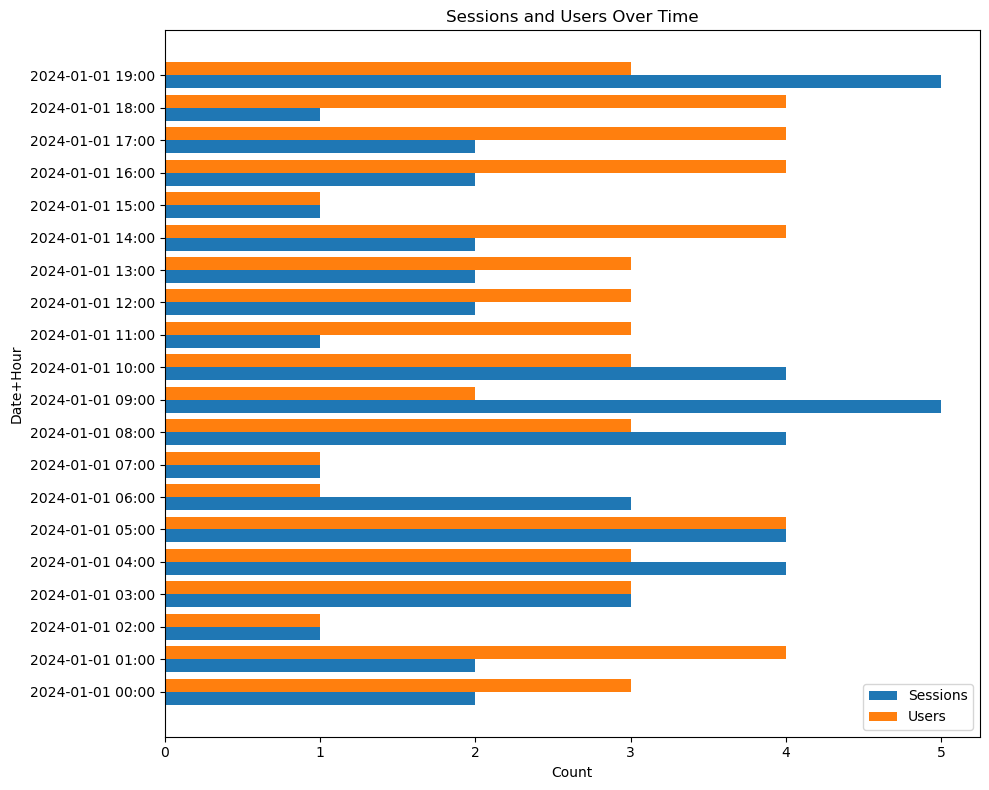

In [111]:
N = 20
subset = df.head(N)
y = np.arange(len(subset["Date+hour"]))  
plt.figure(figsize=(10, 8))
plt.barh(y - 0.2, subset["Sessions"], height=0.4, label="Sessions")
plt.barh(y + 0.2, subset["Users"], height=0.4, label="Users")
plt.yticks(y, subset["Date+hour"].dt.strftime('%Y-%m-%d %H:%M'))
plt.title("Sessions and Users Over Time")
plt.xlabel("Count")
plt.ylabel("Date+Hour")
plt.legend()
plt.tight_layout()
plt.show()

# Total Users by Channel

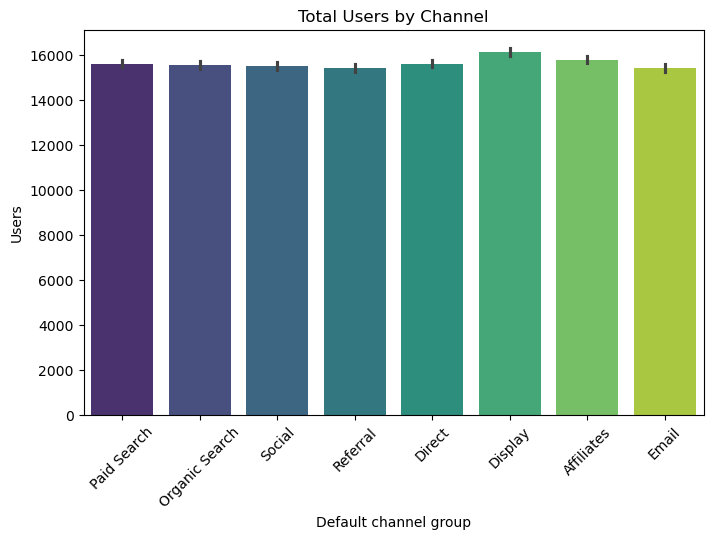

In [113]:
plt.figure(figsize =(8,5))
sns.barplot(data=df, x="Default channel group", y="Users", hue="Default channel group", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation = 45)
plt.show()

# Average Engagement Time by Channel

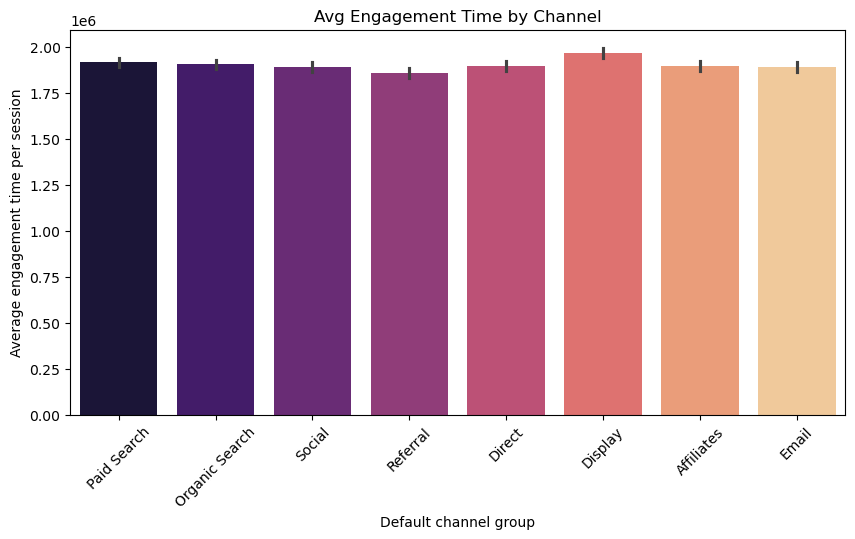

In [77]:
plt.figure(figsize =(10,5))
sns.barplot(data=df, x="Default channel group", y="Average engagement time per session", hue="Default channel group", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation = 45)
plt.show()

# Engagement Rate Distribution by Channel

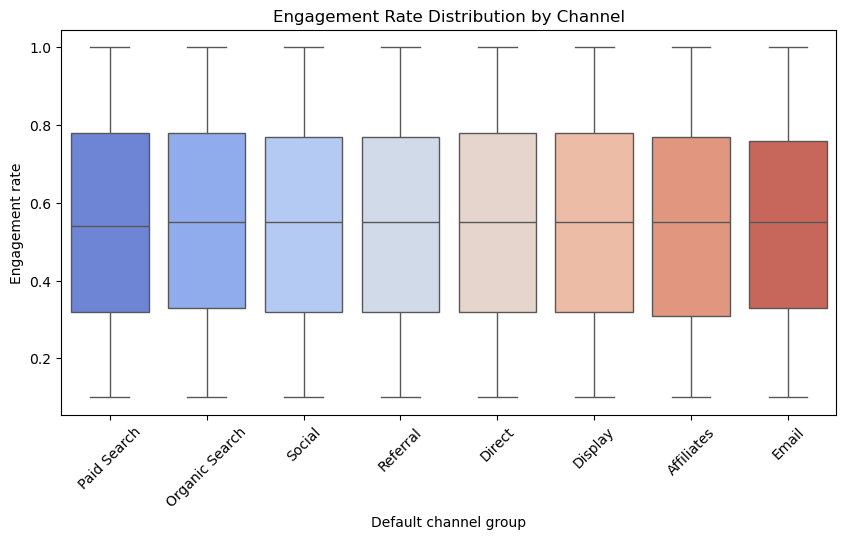

In [115]:
plt.figure(figsize =(10,5))
sns.boxplot(data=df, x="Default channel group", y="Engagement rate", hue="Default channel group",  palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation = 45)
plt.show()

# Engaged Vs Non-Engaged Sessions

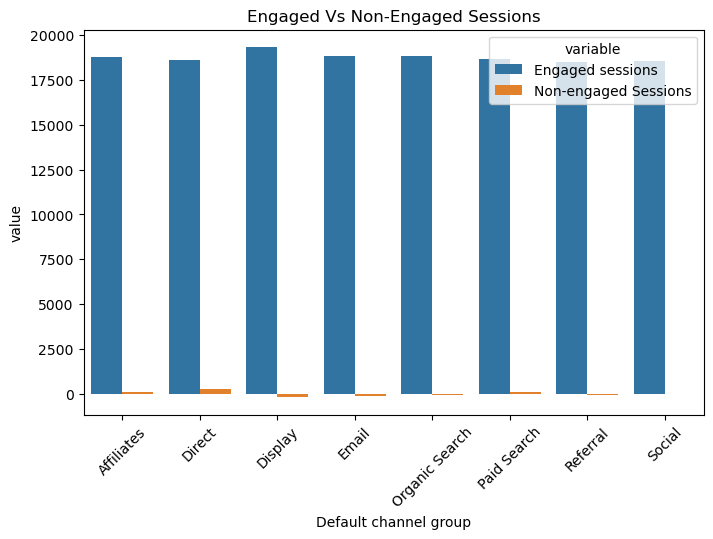

In [117]:
session_df = df.groupby("Default channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-engaged Sessions"]= session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars = "Default channel group", value_vars = ["Engaged sessions", "Non-engaged Sessions"])

plt.figure(figsize =(8,5))
sns.barplot(data=session_df_melted, x="Default channel group", y="value", hue="variable")
plt.title("Engaged Vs Non-Engaged Sessions")
plt.xticks(rotation = 45)
plt.show()

# Traffic by hour and Channel

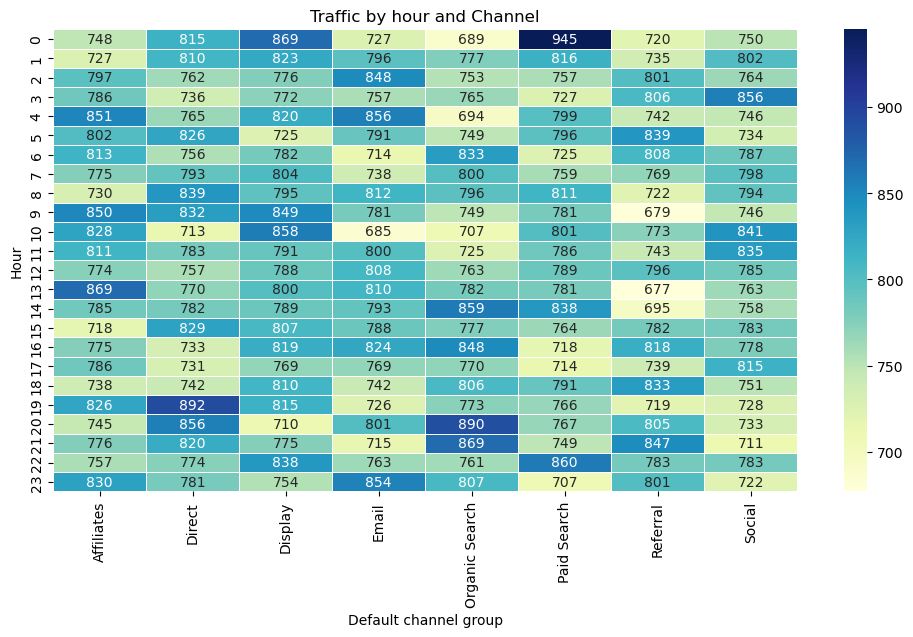

In [127]:
heatmap_data = df.groupby(["Hour", "Default channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize =(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by hour and Channel")
plt.xlabel("Default channel group")
plt.ylabel("Hour")
plt.show()